# ecoli

In [1]:
from __future__ import absolute_import, print_function, division
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cobra
import roadrunner

from IPython.display import display, HTML

import sbmlutils
from sbmlutils import dfba
from sbmlutils.dfba.simulator import simulate_dfba
from sbmlutils.dfba import utils

print('sbmlutils:', sbmlutils.__version__)
print('cobra:', cobra.__version__)
print('roadrunner:', roadrunner.__version__)

print(os.getcwd())

sbmlutils: 0.1.5a5
cobra: 0.6.1
roadrunner: 1.4.18; Compiler: gcc 4.8.2, C++ version: 199711; JIT Compiler: LLVM-3.3; Date: May 17 2017, 17:41:04; LibSBML Version: 5.14.0
/home/mkoenig/git/dfba/models/ecoli


## Simulation settings

In [9]:
model_id = "ecoli"
tend = 3.5
dt = 0.01

In [17]:
def plot_results(df, mid):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
    kwargs = {}

    sids_main = ['for_e', 'lac__D_e', 'pyr_e', 'etoh_e', 'gln__L_e', 'akg_e', 'acald_e', 'glu__L_e', 'mal__L_e', 'X',
                 'fum_e', 'fru_e', 'succ_e', 'ac_e', 'glc__D_e']
    sids_cofactor = ['pi_e', 'h_e', 'o2_e', 'co2_e', 'h2o_e', 'nh4_e']

    for sid in sids_main:
        for ax in (ax1, ax2):
            ax.plot(df.time, df['[{}]'.format(sid)], label="[{}]".format(sid), **kwargs)

    for sid in sids_cofactor:
        for ax in (ax3, ax4):
            ax.plot(df.time, df['[{}]'.format(sid)], label="[{}]".format(sid), **kwargs)

    for ax in (ax2, ax4):
        ax.set_yscale('log')

    for ax in (ax1, ax2, ax3, ax4):
        ax.set_title(mid)
        ax.set_ylabel('Concentration [?]')
        ax.set_xlabel('time [h]')
        ax.legend()
    plt.show()
    return fig

## mk model

./mk/v6/ecoli_top.xml
ecoli_mk_v6-sbmlutils

Simulation time     : 5.414 [s]
Total time          : 6.327 [s]
Overhead time       : 0.912 [s] (14.4 %)



time       [X]    [ac_e]  [acald_e]  [akg_e]   [co2_e]  [dummy_S]  \
0.00  0.00  0.001000  1.000000        1.0      1.0  1.000000        0.0   
0.01  0.01  0.007499  1.082647        1.0      1.0  1.056904        0.0   
0.02  0.02  0.013674  1.172730        1.0      1.0  1.094100        0.0   
0.03  0.03  0.019556  1.271809        1.0      1.0  1.118165        0.0   
0.04  0.04  0.025174  1.378985        1.0      1.0  1.130413        0.0   

      [etoh_e]  [fba__M_13dpg_c]  [fba__M_2pg_c]      ...       \
0.00       1.0               0.0             0.0      ...        
0.01       1.0               0.0             0.0      ...        
0.02       1.0               0.0             0.0      ...        
0.03       1.0               0.0             0.0      ...        
0.04       1.0               0.0             0.0      ...        

      ub_EX_glu__L_e  ub_EX_h2o_e  ub_EX_h_e  ub_EX_lac__D_e  ub_EX_mal__L_e  \
0.00          1000.0       1000.0     1000.0          1000.0          1000.0   
0.01          1000.0       1000.0     1000.0          1000.0          1000.0   
0.02          1000.0       1000.0     1000.0          1000.0          1000.0   
0.03          1000.0       1000.0     1000.0          1000.0          1000.0   
0.04          1000.0       1000.0     1000.0          1000.0          1000.0   

      ub_EX_nh4_e  ub_EX_o2_e  ub_EX_pi_e  ub_EX_pyr_e  ub_EX_succ_e  
0.00       1000.0      1000.0      1000.0       1000.0        1000.0  
0.01       1000.0      1000.0      1000.0       1000.0        1000.0  
0.02       1000.0      1000.0      1000.0       1000.0        1000.0  
0.03       1000.0      1000.0      1000.0       1000.0        1000.0  
0.04       1000.0      1000.0      1000.0       1000.0        1000.0  

[5 rows x 303 columns]

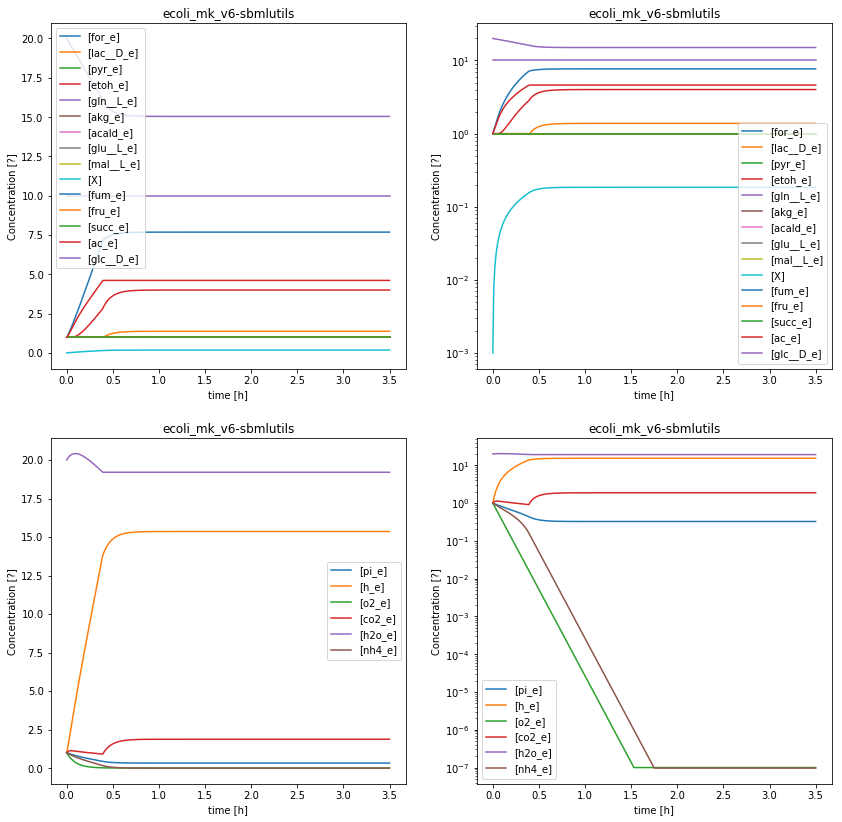

In [22]:
version_mk = 'v6'
sbml_mk = './mk/{}/ecoli_top.xml'.format(version_mk)
mid_mk = '{}_mk_{}-sbmlutils'.format(model_id, version)
print(sbml_mk)
print(mid_mk)

# simulation 
df_mk, dfba_model_mk, dfba_simulator_mk = simulate_dfba(sbml_mk, tend=tend, dt=dt)

# results
display(df_mk.head())
df_mk.to_csv('./{}.csv'.format(mid_mk))

fig = plot_results(df_mk, mid_mk)
fig.savefig('./{}.png'.format(mid_mk), bbox_inches='tight')